In [1]:
import pandas as pd
from pandas import Timestamp
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

## Dropped rows (with null):
> • Precipitation(in) (1998358)<br>• End_Lat (2246264)<br>• End_Lng (2246264)<br>• Number (1917605)<br>• Wind_Chill(F) (1852623)<br>• Airport_Code (5691)<br>• Pressure(in) (48142)<br>• Wind_Direction (45101)<br>• Timezone (3163)

---
## Dropped rows (no null):
> • ID<br>• Source (MapQuest/Bing)<br>• Country (all USA)<br>• Street (157,947 street names)<br>• Turning_Loop (because all False)

In [2]:
df = pd.read_csv('data/3-accidents-dummies-next.csv')

In [3]:
df.head()

,Unnamed: 0,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,0,0,0
1,1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,L,Reynoldsburg,Franklin,OH,...,0,0,0,0,0,0,0,0,0,1
2,2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,R,Williamsburg,Clermont,OH,...,0,0,0,0,0,1,0,0,1,1
3,3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,1,1,1
4,4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,1,1,1,1,1


In [4]:
df.columns

Index(['Unnamed: 0', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Weather_Timestamp', 'Temperature', 'Humidity_pct', 'Visibility_mi',
       'Windspeed_mph', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', 1, inplace=True)

In [6]:
df.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.TMC.value_counts()

201.0    2551829
241.0     213424
245.0      34751
229.0      22197
203.0      16238
222.0      12282
244.0      10769
406.0       8789
246.0       6170
202.0       5806
343.0       5670
247.0       4526
236.0       2050
206.0       1120
248.0        991
339.0        741
341.0        482
336.0         78
200.0         62
239.0         51
351.0          5
Name: TMC, dtype: int64

In [8]:
california = df[df['State'] == 'CA']

In [9]:
california.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

## Extract day of week
> Make additional column for 'day_of_week' based on 'Start_Time'<br>0-Monday<br>1-Tuesday<br>2-Wednesday<br>3-Thursday<br>4-Friday<br>5-Saturday<br>6-Sunday

In [10]:
df['day_of_week']=df['Start_Time'].apply(lambda x: pd.Timestamp(x))

In [11]:
df['day_of_week']=df['day_of_week'].apply(lambda x: x.dayofweek)

In [12]:
df.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'day_of_week'],
      dtype='object')

In [13]:
df.day_of_week.value_counts().to_frame()

,day_of_week
1,530496
2,524529
4,522272
3,513900
0,494681
5,164973
6,147180


## Narrowing down to California

In [14]:
california=df[df['State']=='CA']

In [15]:
california.Side.value_counts()

R    578616
L     67350
          1
Name: Side, dtype: int64

In [16]:
california['Side']=california['Side'].str.replace(' ', 'R')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
california.Side.value_counts()

R    578617
L     67350
Name: Side, dtype: int64

In [18]:
california.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'day_of_week'],
      dtype='object')

In [19]:
california

,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,Zipcode,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week
726,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,0.000,R,Vallejo,Solano,CA,94591,...,0,0,0,0,0,1,1,1,1,1
727,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.000,R,Hayward,Alameda,CA,94544,...,0,0,0,0,0,1,1,1,1,1
728,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,0.000,R,Walnut Creek,Contra Costa,CA,94595,...,0,0,0,0,0,1,1,1,1,1
729,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.000,R,Cupertino,Santa Clara,CA,95014,...,0,0,0,0,0,1,1,1,1,1
730,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.000,R,San Jose,Santa Clara,CA,95118,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898026,201.0,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,R,Riverside,Riverside,CA,92501,...,0,0,0,0,0,1,1,1,1,4
2898027,201.0,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,R,San Diego,San Diego,CA,92108,...,0,0,0,0,0,1,1,1,1,4
2898028,201.0,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,R,Orange,Orange,CA,92866,...,0,0,0,0,0,1,1,1,1,4
2898029,201.0,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,R,Culver City,Los Angeles,CA,90230,...,0,0,0,0,0,1,1,1,1,4


---

# BEGIN Modeling: California

## Extracting year for visualization

In [20]:
california['month_year'] = pd.to_datetime(california['Start_Time']).dt.to_period('M')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
years_acc = california['month_year'].value_counts().to_frame()

In [22]:
years_acc = years_acc.sort_index()

In [23]:
years_acc.reset_index(inplace=True)

In [24]:
years_acc.rename(columns={'index':'month_year', 'month_year':'accidents'}, inplace=True)

In [25]:
years_acc['month_year']=years_acc['month_year'].apply(lambda x: str(x))

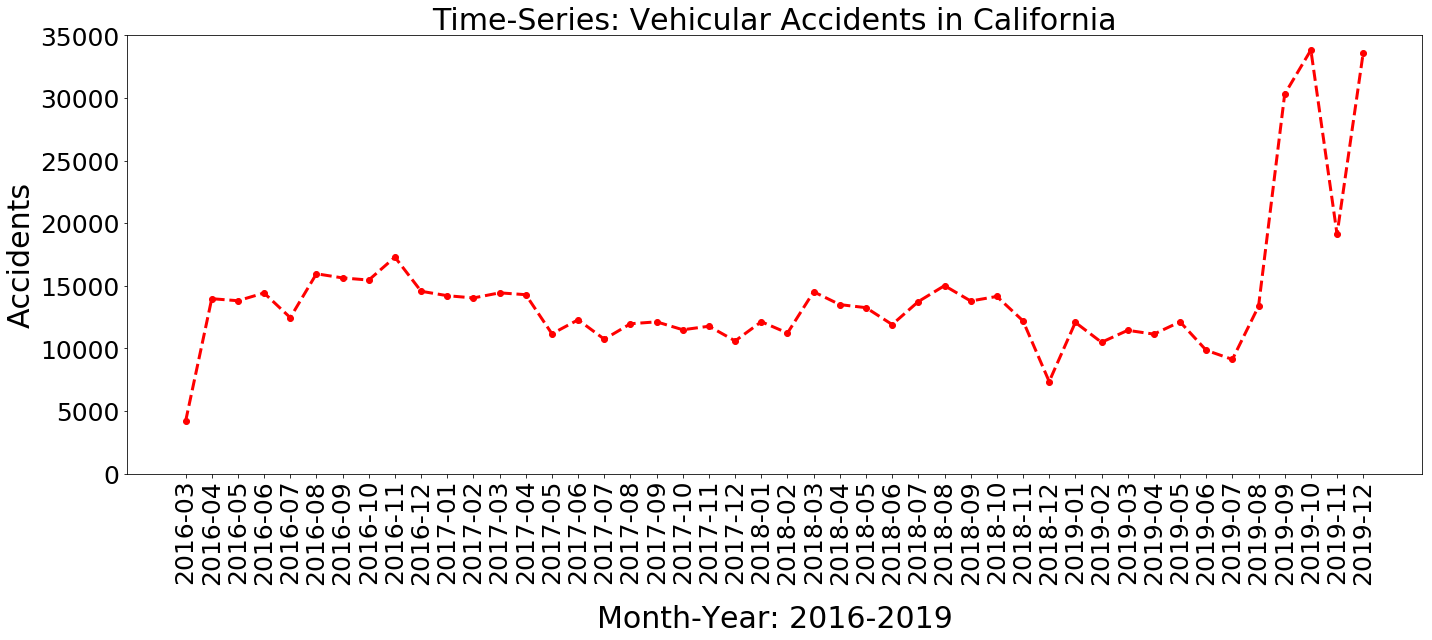

In [63]:
fig, ax = plt.subplots(figsize=(20,9))

ax.plot(years_acc['month_year'],
        years_acc['accidents'],
        marker='o',
        linestyle='dashed',
        linewidth=3,
        color='red'
)

ax.xaxis.set_tick_params(pad=20)
ax.tick_params(axis='x',
              pad=2,
              grid_linewidth=1)
plt.ylim(0,35000)
plt.xticks(rotation=90,
          fontsize=25)
plt.yticks(fontsize=25)
plt.title('Time-Series: Vehicular Accidents in California',
         fontsize=30)
plt.xlabel('Month-Year: 2016-2019',
          fontsize=30,
          labelpad=20)
plt.ylabel('Accidents',
          fontsize=30)

plt.tight_layout()
plt.savefig('img/timeseries.jpg');

In [27]:
california.drop('State', 1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Backup DataFrame

In [28]:
california_month_year = california.copy()

In [29]:
california.drop('month_year',1,inplace=True)

In [30]:
california.drop(columns=['Start_Time', 'End_Time'], inplace=True)

In [31]:
california.drop('Weather_Timestamp',1,inplace=True)

In [32]:
california.rename({'Distance(mi)':'Distance'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [33]:
california['Side']=california['Side'].map({'L':0, 'R':1})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
california.sample(10)

,TMC,Severity,Distance(mi),Side,City,County,Zipcode,Temperature,Humidity_pct,Visibility_mi,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week
106864,201.0,2,0.010,1,San Dimas,Los Angeles,91773,59.0,63.0,10.0,...,0,0,0,0,0,1,1,1,1,2
2472966,201.0,2,0.000,1,Chula Vista,San Diego,91911,67.0,63.0,10.0,...,0,0,0,0,0,0,0,0,1,3
82247,201.0,2,0.000,0,Beverly Hills,Los Angeles,90210,66.0,73.0,7.0,...,0,0,0,0,0,1,1,1,1,4
1434780,241.0,2,0.000,0,Newhall,Los Angeles,91321,81.0,39.0,10.0,...,0,0,0,0,0,0,0,0,0,1
2505893,201.0,2,0.000,1,Salinas,Monterey,93905,61.0,44.0,10.0,...,0,0,0,0,0,1,1,1,1,1
916765,201.0,3,0.000,1,Cupertino,Santa Clara,95014,59.0,83.0,10.0,...,0,0,0,0,0,1,1,1,1,2
1948108,241.0,2,0.000,1,Sherman Oaks,Los Angeles,91403,64.9,73.0,10.0,...,0,0,0,0,0,1,1,1,1,1
2614746,201.0,4,0.139,1,Long Beach,Los Angeles,90810,50.0,93.0,6.0,...,0,0,0,0,0,0,0,0,0,3
389437,201.0,2,0.010,1,Sacramento,Sacramento,95824,59.0,78.0,10.0,...,0,0,0,0,0,0,0,0,0,2
2701614,201.0,3,0.353,1,San Francisco,San Francisco,94110,55.9,77.0,10.0,...,0,0,0,0,0,0,0,0,0,2


## Test without City, County, Zipcode

In [35]:
ca_nd = california.copy()

In [36]:
ca_nd.drop(columns=['City', 'County', 'Zipcode'], inplace=True)

In [37]:
ca_nd.sample(5)

,TMC,Severity,Distance(mi),Side,Temperature,Humidity_pct,Visibility_mi,Windspeed_mph,Weather_Condition,Amenity,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week
2606479,201.0,2,0.236,1,60.1,55.0,10.0,3.5,Clear,0,...,0,0,0,0,0,0,0,0,1,0
485029,201.0,3,0.000,1,75.2,65.0,10.0,10.4,Scattered Clouds,0,...,0,0,0,0,0,1,1,1,1,1
1879831,201.0,3,0.000,1,44.6,66.0,10.0,8.1,Scattered Clouds,1,...,0,0,0,0,0,0,0,0,1,4
335466,201.0,2,0.000,1,66.2,49.0,10.0,9.2,Clear,0,...,0,0,0,0,0,1,1,1,1,3
398069,201.0,2,0.010,1,64.9,50.0,10.0,3.5,Clear,0,...,0,0,0,0,0,0,0,0,0,6


## Dummies for Weather_Condition

In [38]:
ca_nd = pd.concat([ca_nd, pd.get_dummies(ca_nd['Weather_Condition'])], axis=1)

In [39]:
ca_nd.shape

(645967, 77)

In [40]:
ca_nd.drop('Weather_Condition',1,inplace=True)

In [41]:
ca_nd = pd.concat([ca_nd, pd.get_dummies(ca_nd['TMC'])], axis=1)

In [42]:
ca_nd.rename(columns={'Distance(mi)':'Distance'}, inplace=True)

In [43]:
ca_nd[['Visibility_mi', 'Windspeed_mph', 'Distance', 'Temperature']].describe()

,Visibility_mi,Windspeed_mph,Distance,Temperature
count,645967.000000,645967.000000,645967.000000,645967.000000
mean,9.170731,7.152403,0.123912,65.686516
std,2.228048,5.707752,0.646170,12.462819
min,0.000000,0.000000,0.000000,-29.900000
25%,10.000000,3.500000,0.000000,57.000000
50%,10.000000,6.000000,0.000000,64.400000
75%,10.000000,9.200000,0.010000,73.400000
max,140.000000,822.800000,227.210007,127.400000


(0, 4.153902084746393)

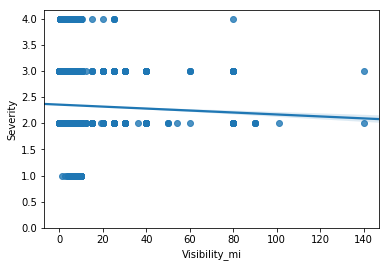

In [44]:
sns.regplot(x='Visibility_mi', y='Severity', data=ca_nd)
plt.ylim(0,)

(0, 4.153902084746393)

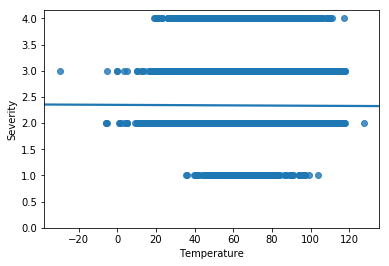

In [45]:
sns.regplot(x='Temperature', y='Severity', data=ca_nd)
plt.ylim(0,)

(0, 4.153902084746393)

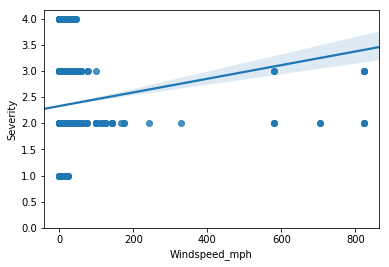

In [46]:
sns.regplot(x='Windspeed_mph', y='Severity', data=ca_nd)
plt.ylim(0,)

(0, 9.095406910526274)

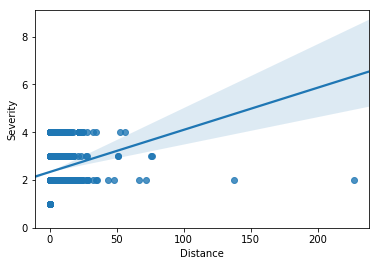

In [47]:
sns.regplot(x='Distance', y='Severity', data=ca_nd)
plt.ylim(0,)

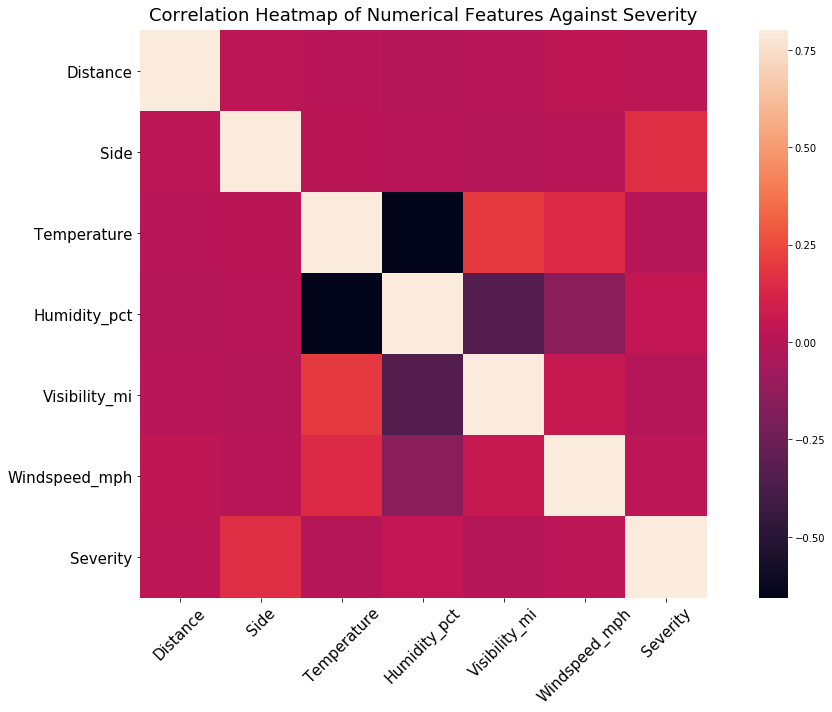

In [60]:
for_heat = ca_nd[['Distance','Side','Temperature','Humidity_pct','Visibility_mi','Windspeed_mph', 'Severity']]
correlation_matrix = for_heat.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)
plt.title('Correlation Heatmap of Numerical Features Against Severity',
         fontsize=18,
         pad=10)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('img/correlation.jpg')